# Nama:Muhammad Zufar Badrus
# NIM   :09011381722130
# Kelas:SK5U (Kecerdasan Buatan)

# Implementasi Logika Fuzzy Untuk Mengatur Perilaku Musuh dalam Game Bertipe Action-RPG

- Setiap musuh dan pemain memiliki 1 jenis, yaitu penyerang. Musuh penyerang akan menyerang dari jarak dekat. Musuh ini memiliki parameter input fuzzy yaitu nyawa dan jarak, dia akan mundur ketika nyawanya lemah atau jaraknya dekat dengan pemain
- Penerapan logika fuzzy pada permainan ini adalah untuk mengatur perilaku musuh, secara singkatnya, jika musuh sedang dalam keadaan lemah, dia akan melarikan diri jika sudah lemah hampir mati. Selain itu, faktor yang menentukan perilaku adalah jarak musuh dengan pemain. Penerapan logika fuzzy pada permainan ini menghasilkan output yaitu musuh yang memiliki kepintaran dalam bertindak.. 

In [61]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

1. skfuzzy  untuk mengeluarkan perintah library fuzzy
2. matplotlib  untuk menampilkan plotting gambar atau grafik dari coding python



Input = Penyerang dibagi menjadi 3 bagian Yaitu
- Dekat (0-800 jarak)
- Sedang(400-1200 jarak)
- Jauh  (800-1600 jarak)

Darah dibagi menjadi 3 bagian
- Sedikit(0-50 HP)
- Sedang (20-80 HP)
- Banyak (50-100 HP)

Output Perilaku yang dibagi menjadi 3 bagian
- Melarikan Diri (0-50)
- Bertahan       (20-80)
- Menyerang      (50-100)


Variabel Penentu Perilaku , dan juga fungsi keanggotaaan
yang menggunakan 2 variabel input yaitu Penyerang dan Darah
dan Variabel Outputnya Perilaku

In [62]:
penyerang = ctrl.Antecedent(np.arange(0,1600, 1), 'penyerang')
darah = ctrl.Antecedent(np.arange(0, 100, 0.5), 'darah')
perilaku = ctrl.Consequent(np.arange(0, 100, 0.5), 'perilaku')

Pada Tipe Penyerang logika fuzzy akan mengatur peluang menyerang musuh berdasarkan darah dan jarak. Secara umum jika darah semakin besar, maka akan semakin agresif

# Fuzzifikasi Penyerang
Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk Penyerang, fungsi keanggotaan dibagi menjadi  3 bagian :
$$  Penyerang $$
$$ Dekat = 0^{\circ} - 800^{\circ}$$
$$ Sedang = 400^{\circ} - 1200^{\circ}$$
$$ Jauh = 800^{\circ} - 1600^{\circ}$$

 \begin{equation}
     \\
    Masukkan\,nilai\,penyerang\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,penyerang\\
  penyerang['dekat'] = \mu PenyerangDekat(x)=\begin{cases}
    1, & \text{$0\leq x\leq800$}.\\
    (800 - x)/(800 - 400) , & \text{$400 \leq x \leq 800$}.\\
    0, & \text{$x\geq 800 $ }.\\
  \end{cases}
  \\
  Penyerang['sedang'] = \mu PenyerangSedang(x)=\begin{cases}
    0, & \text{$x\leq 400$ atau $x\geq1200$}. \\
    (x - 400)/(800 - 400) , & \text{$400 \leq x \leq 800$}.\\
    (1200 - x)/(1200 - 800) , & \text{$800 \leq x \leq 1200$}.\\
  \end{cases}
  \\
    Penyerang['jauh'] = \mu Penyerang Jauh(x)=\begin{cases}
    0, & \text{$x\leq 1200$}.\\
    (1600 - 1200)/(1600 - 1200) , & \text{$1200 \leq x \leq 1600$}.\\
    1, & \text{$x\geq 1600$}.\\
  \end{cases}
  \\
\end{equation}

# PLOTTING MEMBERSHIP FUNCTION PENYERANG

In [63]:
penyerang_x = np.arange(0,1600, 1)

### Plotting fungsi keanggotaan $\mu PenyerangDekat(x)$

Text(0.5,1,'Penyerang Dekat')

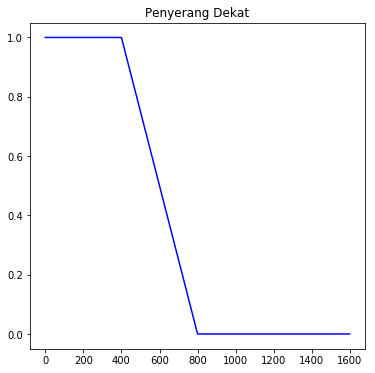

In [64]:
penyerang_dekat = fuzz.trapmf(penyerang_x,[0, 0, 400, 800])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(penyerang_x,penyerang_dekat,'blue')
ax0.set_title('Penyerang Dekat')

# Plotting fungsi keanggotaan $\mu PenyerangSedang(x)$

Text(0.5,1,'Penyerang Sedang')

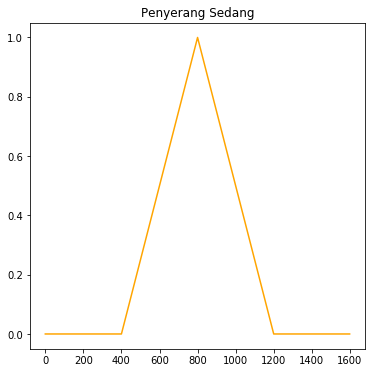

In [65]:
penyerang_sedang = fuzz.trimf(penyerang_x,[400, 800, 1200])
fig2, (ax1) = plt.subplots(nrows=1,figsize=(6,6))
ax1.plot(penyerang_x,penyerang_sedang,'orange')
ax1.set_title('Penyerang Sedang')

### Plotting fungsi keanggotaan $\mu PenyerangJauh(x)$

Text(0.5,1,'Penyerang Jauh')

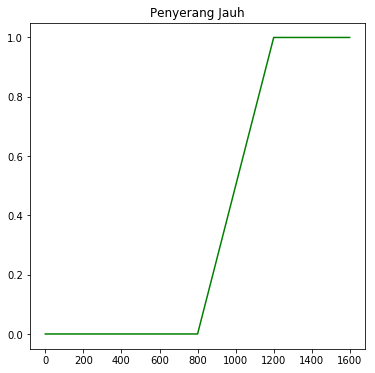

In [66]:
penyerang_jauh = fuzz.trapmf(penyerang_x,[800, 1200, 1600, 1600])
fig3, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(penyerang_x,penyerang_jauh,'green')
ax2.set_title('Penyerang Jauh')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


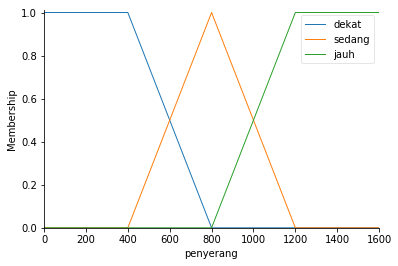

In [68]:
penyerang['dekat'] = fuzz.trapmf(penyerang.universe, [0, 0, 400, 800])
penyerang['sedang'] = fuzz.trimf(penyerang.universe, [400, 800, 1200])
penyerang['jauh'] = fuzz.trapmf(penyerang.universe, [800, 1200, 1600, 1600])
penyerang.view()

# Fuzzifikasi Darah

In [27]:
darah_x = np.arange(0, 100, 0.5)

Untuk Darah, fungsi keanggotaan dibagi menjadi  3 bagian :
$$  Darah $$
$$ Dekat = 0^{\circ} - 50^{\circ}$$
$$ Sedang = 20^{\circ} - 80^{\circ}$$
$$ Jauh = 50^{\circ} - 100^{\circ}$$

\begin{equation}
     \\
    Masukkan\,nilai\,darah\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,darah\\
  Darah['sedikit'] = \mu darahsedikit(x)=\begin{cases}
    1, & \text{$0\leq x\leq50$}.\\
    (50 - x)/(50 - 20) , & \text{$20 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50 $ }.\
  \end{cases}
  \\
  Darah['sedang'] = \mu DarahSedang(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq80$}.\\
    (x - 20)/(50 - 20) , & \text{$0 \leq x \leq 50$}.\\
    (80 - x)/(80 - 50) , & \text{$50 \leq x \leq 80$}.\\
  \end{cases}
  \\
   Darah['Banyak'] = \mu Darah Banyak(x)=\begin{cases}
    0, & \text{$x\leq 80$}.\\
    (100 - 80)/(100 - 80) , & \text{$80 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.\\
  \end{cases}
  \\
\end{equation}

# PLOTTING MEMBERSHIP FUNCTION DARAH

### Plot fungsi keanggotaan $\mu DarahSedikit(x) $

Text(0.5,1,'darah sedikit')

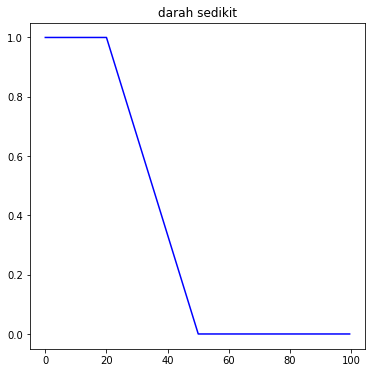

In [28]:
darah_sedikit = fuzz.trapmf(darah_x,[0, 0, 20, 50])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(darah_x,darah_sedikit,'blue')
ax0.set_title('darah sedikit')

### Plot fungsi keanggotaan $\mu DarahSedang(x) $

Text(0.5,1,'Darah Sedang')

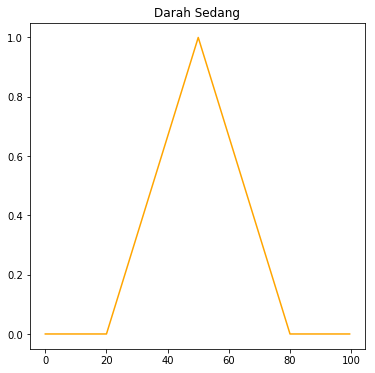

In [29]:
darah_sedang = fuzz.trimf(darah_x,[20, 50, 80 ])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(darah_x,darah_sedang,'orange')
ax0.set_title('Darah Sedang')

### Plot fungsi keanggotaan $\mu DarahBanyak(x) $

Text(0.5,1,'darah banyak')

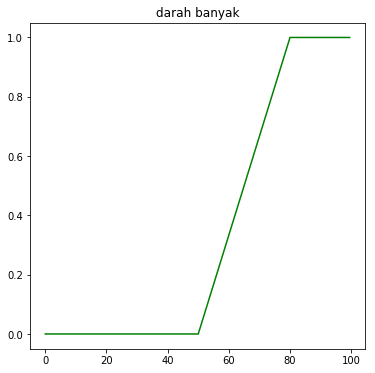

In [30]:
darah_banyak = fuzz.trapmf(darah_x,[50, 80, 100, 100])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(darah_x,darah_banyak,'green')
ax0.set_title('darah banyak')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


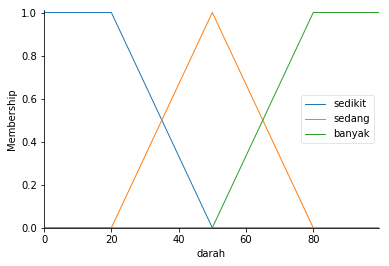

In [69]:
darah['sedikit'] = fuzz.trapmf(darah.universe, [0, 0, 20, 50])
darah['sedang'] = fuzz.trimf(darah.universe, [20, 50, 80 ])
darah['banyak'] = fuzz.trapmf(darah.universe, [50, 80, 100, 100])
darah.view()

# Fuzzifikasi Perilaku

In [32]:
perilaku_x = np.arange(0, 100, 0.5)

Perilaku Musuh dibagi menjadi 3 fungsi keanggotaan yaitu:
- Melarikan Diri (0-50)
- Bertahan       (20-80)
- Menyerang      (50-100)

\begin{equation}
    Masukkan\,nilai\,Perilaku\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,Perilaku\\
  Perilaku['Melarikan Diri'] = \mu PerilakuMelarikanDiri(x)=\begin{cases}
    1, & \text{$0\leq x\leq50$}.\\
    (50 - x)/(50 - 20) , & \text{$20 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50 $ }.\
  \end{cases}
  \\
  Perilaku['Bertahan'] = \mu PerilakuBertahan(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq80$}.\\
    (x - 20)/(50 - 20) , & \text{$0 \leq x \leq 50$}.\\
    (80 - x)/(80 - 50) , & \text{$50 \leq x \leq 80$}.\\
  \end{cases}
  \\
   Perilaku['Menyerang'] = \mu PerilakuMenyerang(x)=\begin{cases}
    0, & \text{$x\leq 80$}.\\
    (100 - 80)/(100 - 80) , & \text{$80 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.\\
    \end{cases}
\end{equation}

In [33]:
perilaku['melarikan diri'] = fuzz.trapmf(perilaku.universe,[0, 0,20 ,50])#dari 0 - 50
perilaku['bertahan'] = fuzz.trimf(perilaku.universe,[20, 50, 80]) #dari 20 - 80
perilaku['menyerang'] = fuzz.trapmf(perilaku.universe,[50,80, 100, 100]) #dari 50 - 100

# PLOTTING FUNCTION MEMBERSHIP PERILAKU

### Plot fungsi keanggotaan $\mu PerilakuMelarikanDiri(x) $

In [55]:
perilaku_x = np.arange(0, 100, 0.5)

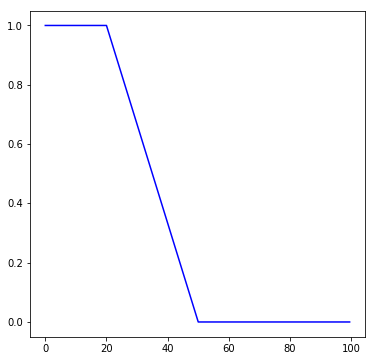

In [56]:
perilaku_melarikan_diri = fuzz.trapmf(perilaku_x,[0, 0, 20 ,50])
fig,(ax0)= plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(perilaku_x,perilaku_melarikan_diri,'blue')

### Plot fungsi keanggotaan $\mu PerilakuBertahan(x) $

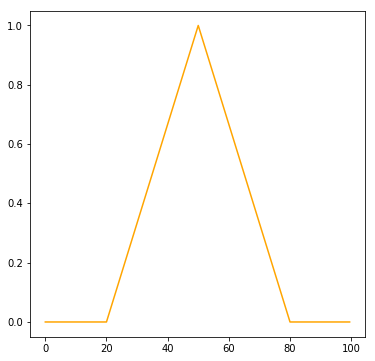

In [57]:
perilaku_bertahan = fuzz.trimf(perilaku_x,[20, 50, 80])
fig,(ax0)= plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(perilaku_x,perilaku_bertahan,'orange')

### Plot fungsi keanggotaan $\mu PerilakuMenyerang(x) $ 

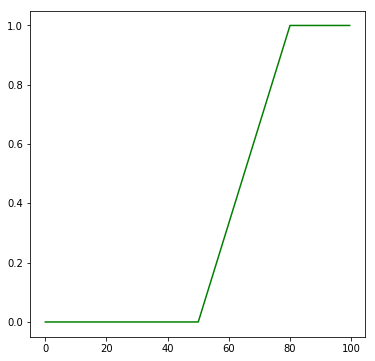

In [58]:
perilaku_menyerang = fuzz.trapmf(perilaku_x,[50,80, 100, 100])
fig,(ax0)= plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(perilaku_x,perilaku_menyerang,'green')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


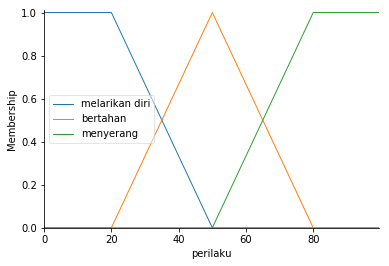

In [70]:
perilaku['melarikan diri'] = fuzz.trapmf(perilaku.universe, [0, 0,20,  50])
perilaku['bertahan'] = fuzz.trimf(perilaku.universe, [20, 50, 80])
perilaku['menyerang'] = fuzz.trapmf(perilaku.universe, [50,80, 100, 100])
perilaku.view()

# INTERFERENCING

In [71]:
rule1 = ctrl.Rule(penyerang['dekat'] & darah['sedikit'], perilaku['melarikan diri'])
rule2 = ctrl.Rule(penyerang['dekat'] & darah['sedang'], perilaku['bertahan'])
rule3 = ctrl.Rule(penyerang['dekat'] & darah['banyak'], perilaku['menyerang'])
rule4 = ctrl.Rule(penyerang['sedang'] & darah['sedikit'], perilaku['melarikan diri'])
rule5 = ctrl.Rule(penyerang['sedang'] & darah['sedang'], perilaku['bertahan'])
rule6 = ctrl.Rule(penyerang['sedang'] & darah['banyak'], perilaku['menyerang'])
rule7 = ctrl.Rule(penyerang['jauh'] & darah['sedikit'], perilaku['melarikan diri'])
rule8 = ctrl.Rule(penyerang['jauh'] & darah['sedang'], perilaku['bertahan'])
rule9 = ctrl.Rule(penyerang['jauh'] & darah['banyak'], perilaku['menyerang'])

# RULE EVALUATION

In [72]:
perilaku_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

Input Penyerang Kita Masukan = 900
Input Darah Kita Masukan 40

In [83]:
tindakan = ctrl.ControlSystemSimulation(perilaku_ctrl)
tindakan.input['penyerang'] = 900
tindakan.input['darah'] = 40

tindakan.compute()
print(tindakan.output['perilaku'])

41.11111111111116


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


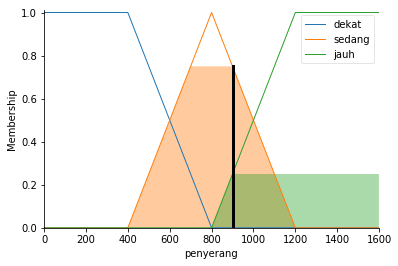

In [79]:
penyerang.view(sim=tindakan)

Plotting fungsi keangggotaan penyerang setelah dimasukkan input nilai pada penyerang

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


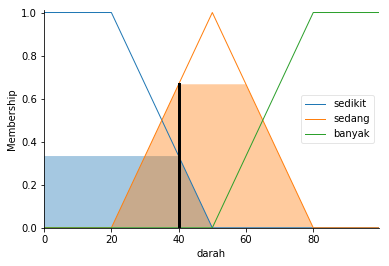

In [80]:
darah.view(sim=tindakan)

Plotting fungsi keangggotaan darah setelah dimasukkan input nilai pada darah

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


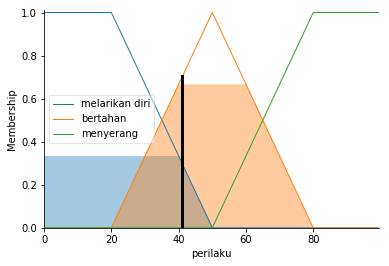

In [82]:
perilaku.view(sim=tindakan)

Plotting fungsi keangggotaan perilaku setelah dilakukan perhitungan defuzzifikasi output nilai pada perilaku

# PERHITUNGAN MANUAL

 \begin{equation}
    Penyerang =900 \\
    Masukkan\,nilai\,penyerang\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,penyerang\\
  penyerang['dekat'] = \mu PenyerangDekat(x)=\begin{cases}
    1, & \text{$0\leq x\leq800$}.\\
    (800 - x)/(800 - 400) , & \text{$400 \leq x \leq 800$}.\\
    0, & \text{$x\geq 800 $ }.\checkmark
  \end{cases}
  \\
  Penyerang['sedang'] = \mu PenyerangSedang(x)=\begin{cases}
    0, & \text{$x\leq 400$ atau $x\geq1200$}. \\
    (x - 400)/(800 - 400) , & \text{$400 \leq x \leq 800$}.\\
    (1200 - x)/(1200 - 800) , & \text{$800 \leq x \leq 1200$}.\checkmark\\
  \end{cases}
  \\
    Penyerang['jauh'] = \mu Penyerang Jauh(x)=\begin{cases}
    0, & \text{$x\leq 1200$}.\checkmark\\
    (1600 - 1200)/(1600 - 1200) , & \text{$1200 \leq x \leq 1600$}.\\
    1, & \text{$x\geq 1600$}.\\
  \end{cases}
  \\
\end{equation}

 \begin{equation}
 Penyerang = 900 \\
 \mu PenyerangSedang(900) = (1200 - 900) / ( 1200 - 800 ) \\
    \mu PenyerangSedang(900) =300/400\\
    \mu PenyerangSedang(900) =0,75\\
    \end{equation}

\begin{equation}
    Darah = 40 \\
    Masukkan\,nilai\,darah\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,darah\\
  Darah['sedikit'] = \mu darahsedikit(x)=\begin{cases}
    1, & \text{$0\leq x\leq50$}.\\
    (50 - x)/(50 - 20) , & \text{$20 \leq x \leq 50$}.\checkmark\\
    0, & \text{$x\geq 50 $ }.\
  \end{cases}
  \\
  Darah['sedang'] = \mu DarahSedang(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq80$}.\\
    (x - 20)/(50 - 20) , & \text{$0 \leq x \leq 50$}.\checkmark\\
    (80 - x)/(80 - 50) , & \text{$50 \leq x \leq 80$}.\\
  \end{cases}
  \\
   Darah['Banyak'] = \mu Darah Banyak(x)=\begin{cases}
    0, & \text{$x\leq 80$}.\checkmark\\
    (100 - 80)/(100 - 80) , & \text{$80 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.\\
  \end{cases}
  \\
\end{equation}

 \begin{equation}
 \mu DarahSedikit(40) = (50 - 40) / ( 50 - 20 ) \\
 \mu DarahSedikit(40) = (10) / (30 ) \\
 \mu DarahSedikit(40) = 0,33 \\
    \mu DarahSedang(50) =(40 - 20) / ( 50 - 20)\\
    \mu DarahSedang(50) =(20) / (30)\\
    \mu DarahSedang(50) =0.66
\end{equation}

# Lalu kita cari nilai z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND

1 IF penyerang Dekat AND Darah Sedikit THEN Perilaku Melarikan diri

$$ \\ \alpha(predikat_1) = \mu PenyerangDekat \cap \mu DarahSedikit $$
$$\alpha(predikat_1)   = min (\mu PenyerangDekat[900], \mu DarahSedikit[40]) $$
$$ \alpha(predikat_1) = min (0;0,33) $$
$$ \alpha(predikat_1) = 0 $$

Lalu lihat himpunan Perilaku Melarikan diri 

\begin{equation}
 Perilaku['Melarikan Diri'] = \mu PerilakuMelarikanDiri(x)=\begin{cases}
    1, & \text{$0\leq x\leq50$}.\\
    (50 - x)/(50 - 20) , & \text{$20 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50 $ }.\
  \end{cases}
\end{equation}
Maka nilai $ Z_1 = 0 $

 2 IF Penyerang Dekat AND Darah Sedang THEN Perilaku Bertahan

$$ \\ \alpha(predikat_2) = \mu Penyerang Dekat \cap \mu Darah Sedang $$
$$\alpha(predikat_2)   = min (\mu Penyerang Dekat[900], \mu Darah Sedang[40]) $$
$$ \alpha(predikat_2) = min (0; 0,66) $$
$$ \alpha(predikat_2) = 0 $$

Lalu lihat himpunan Perilaku Bertahan 

\begin{equation}
Perilaku['Bertahan'] = \mu PerilakuBertahan(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq80$}.\\
    (x - 20)/(50 - 20) , & \text{$0 \leq x \leq 50$}.\\
    (80 - x)/(80 - 50) , & \text{$50 \leq x \leq 80$}.\\
  \end{cases}
\end{equation}
Maka nilai $ Z_2 = 0 

 3 IF Penyerang  Dekat AND Darah Banyak THEN Perilaku Menyerang

$$ \\ \alpha(predikat_3) = \mu Penyerang Dekat \cap \mu Darah Banyak $$
$$\alpha(predikat_3)   = min (\mu Penyerang Dekat[900], \mu Darah Banyak[40]) $$
$$ \alpha(predikat_3) = min (0; 0) $$
$$ \alpha(predikat_3) = 0 $$
Lalu lihat himpunan Perilaku Menyerang

\begin{equation}
 Perilaku['Menyerang'] = \mu PerilakuMenyerang(x)=\begin{cases}
    0, & \text{$x\leq 80$}.\\
    (100 - 80)/(100 - 80) , & \text{$80 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.\\
    \end{cases}
\end{equation}
Maka nilai $ Z_3 = 0 $

4 IF Penyerang  Sedang AND Darah Sedikit THEN Perilaku Melarikan Diri

$$ \\ \alpha(predikat_4) = \mu Penyerang Sedang \cap \mu Darah Sedikit $$
$$\alpha(predikat_4)   = min (\mu Penyerang Sedang[900], \mu Darah Sedikit[40]) $$
$$ \alpha(predikat_4) = min (0,75; 0) $$
$$ \alpha(predikat_4) = 0 $$
Lalu lihat himpunan Perilaku Melarikan Diri

\begin{equation}
Perilaku['Melarikan Diri'] = \mu PerilakuMelarikanDiri(x)=\begin{cases}
    1, & \text{$0\leq x\leq50$}.\\
    (50 - x)/(50 - 20) , & \text{$20 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50 $ }.\
  \end{cases}
\end{equation}
Maka nilai $ Z_4 = 0 $

 IF Penyerang Sedang AND Darah Sedang THEN Perilaku Bertahan

$$ \\ \alpha(predikat_5) = \mu Penyerang Sedang \cap \mu Darah Sedang $$
$$\alpha(predikat_5)   = min (\mu Penyerang Sedang[30], \mu Darah Sedang[200]) $$
$$ \alpha(predikat_5) = min (0,75; 0,66) $$
$$ \alpha(predikat_5) = 0,66 $$

\begin{equation}
Perilaku['Bertahan'] = \mu PerilakuBertahan(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq80$}.\\
    (x - 20)/(50 - 20) , & \text{$0 \leq x \leq 50$}.\\
    (80 - x)/(80 - 50) , & \text{$50 \leq x \leq 80$}.\\
\end{cases}
\end{equation}
Terdapat 2 nilai keanggotaan maka kita uji satu persatu
 $$(x- 20) / (50 - 20) = 0.66 $$
 $$ x - 20 = 0.66 \times 30 $$
 $$ x - 20 = 19.8 $$
 $$ x = 39.8 $$
 
 $$ (80 - x) / (80 - 50) = 0.66 $$
 $$ (80 - x) = 19.8 $$
 $$ - x = -60.2 $$
 $$ x = 60.2 $$

Akan diambil Nilai Terckecil Maka nilai $ Z_5 = 39.8 

6 IF Penyerang Sedang dan Darah Banyak THEN Perilaku Menyerang

$$ \\ \alpha(predikat_6) = \mu Penyerang Sedang \cap \mu Darah Banyak $$
$$\alpha(predikat_6)   = min (\mu Penyerang Sedang[900], \mu Darah Banyak[40]) $$
$$ \alpha(predikat_6) = min (0,75; 0) $$
$$ \alpha(predikat_6) = 0 $$

Lalu lihat himpunan Perilaku Menyerang

\begin{equation}
Perilaku['Menyerang'] = \mu PerilakuMenyerang(x)=\begin{cases}
    0, & \text{$x\leq 80$}.\\
    (100 - 80)/(100 - 80) , & \text{$80 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.\\
    \end{cases}
\end{equation}
Maka nilai $ Z_6 = 0 $

7 IF Penyerang Jauh dan Darah Sedikit THEN Melarikan Diri
$$ \\ \alpha(predikat_7) = \mu Penyerang Jauh \cap \mu Darah Sedikit $$
$$\alpha(predikat_7)   = min (\mu Penyerang Jauh[900], \mu Darah Sedikit[40]) $$
$$ \alpha(predikat_7) = min (0; 0) $$
$$ \alpha(predikat_7) = 0 $$

Lalu lihat himpunan Perilaku Melarikan Diri

\begin{equation}
Perilaku['Melarikan Diri'] = \mu PerilakuMelarikanDiri(x)=\begin{cases}
    1, & \text{$0\leq x\leq50$}.\\
    (50 - x)/(50 - 20) , & \text{$20 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50 $ }.\
  \end{cases}
\end{equation}
Maka nilai $ Z_7 = 0 $

 8 IF Penyerang Jauh dan Darah Sedang THEN Perilaku Bertahan
$$ \\ \alpha(predikat_8) = \mu Penyerang Jauh \cap \mu Darah Sedang $$
$$\alpha(predikat_8)   = min (\mu Penyerang Jauh[900], \mu Darah Sedang[40]) $$
$$ \alpha(predikat_8) = min (0; 0,66) $$
$$ \alpha(predikat_8) = 0 $$
Lalu lihat himpunan Perilaku Bertahan

\begin{equation}
Perilaku['Bertahan'] = \mu PerilakuBertahan(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq80$}.\\
    (x - 20)/(50 - 20) , & \text{$0 \leq x \leq 50$}.\\
    (80 - x)/(80 - 50) , & \text{$50 \leq x \leq 80$}.\\
  \end{cases}
\end{equation}
Maka nilai $ Z_8 = 0 

9 IF Penyerang Jauh dan Darah Banyak THEN Perilaku Menyerang
$$ \\ \alpha(predikat_9) = \mu Penyerang Jauh \cap \mu Darah Banyak $$
$$\alpha(predikat_9)   = min (\mu Penyerang Jauh[900], \mu Darah Banyak[40]) $$
$$ \alpha(predikat_9) = min (0; 0) $$
$$ \alpha(predikat_9) = 0 $$

Lalu lihat himpunan Durasi Sangat Cepat

\begin{equation}
Perilaku['Menyerang'] = \mu PerilakuMenyerang(x)=\begin{cases}
    0, & \text{$x\leq 80$}.\\
    (100 - 80)/(100 - 80) , & \text{$80 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.\\
    \end{cases}
\end{equation}
Maka nilai $ Z_9 = 0 $

Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 }
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9}$$

 $$Z = \frac{0 + 0 + 0 \times 0 + 0 + 0,66  \times 39,8 + 0 + 0}{0 + 0 + 0 + 0 + 0,66  + 0 + 0 + 0 + 0 } $$
 
 $$ Z = \frac{26,268}{0,66} $$
 $$ Z = 39,8 \,  $$

Hasil output yang dikeluarkan menggunakan code python sebesar 41.11 sedangkan perhitungan manual sebesar 39,8.
Terdapat perbedaan sebesar 1.31

# Referensi
1. https://jurnaleeccis.ub.ac.id/index.php/eeccis/article/view/196
2. https://github.com/xxvvanda/Fuzzy-Logic-In-Indonesian/blob/master/fuzzy%20original.py